Import data from https://github.com/EdinburghNLP/code-docstring-corpus


In [1]:
from nltk.util import everygrams
import nltk
from nltk.tokenize.simple import CharTokenizer
from collections import Counter, defaultdict
import itertools
from tqdm.auto import tqdm
import string
import os

In [2]:
#https://blog.nelsonliu.me/2016/07/29/progress-bars-for-python-file-reading-with-tqdm/
import mmap

def get_num_lines(file_path):
    fp = open(file_path, "r+")
    buf = mmap.mmap(fp.fileno(), 0)
    lines = 0
    while buf.readline():
        lines += 1
    return lines

In [3]:
keys = []
project_dir = os.path.abspath(os.pardir)
external_data_dir = os.path.join(project_dir, "data", "external")
with os.scandir(external_data_dir) as it:
    # occaisonally purge
#     for gram in gram_counts.copy():
#       # remove small instance words
#       if gram_counts[gram] <= 40:
#         del gram_counts[gram]
    for entry in it:
        if entry.name.endswith('log'):
            print("processing ", entry.path)
            # ignore decoding errors
            with open(entry.path, errors='ignore') as infile:
                for line in tqdm(infile, total=get_num_lines(entry.path), desc=entry.name):
#                     line = line.split("\t")
#                     count = line.pop(0)
#                     line_string = "".join(line)
#                     everygrammed = list(everygrams(line_string))
#                     for gram in everygrammed:
#                         gram_counts[gram] += int(count)
                    keys.append(line.strip())
    
key_counts = Counter(keys)

processing  /home/richard/src/dickbit/data/external/keylogger.log


In [4]:
c=Counter()
for k, v in key_counts.items():
    k = k.lower()
    c[k] = v
c.most_common(50)

[('backspace', 24936),
 ('down', 21156),
 ('space', 19609),
 ('return', 17067),
 ('control_l', 13239),
 ('shift_l', 11939),
 ('super_l', 11926),
 ('right', 9450),
 ('up', 8319),
 ('left', 7901),
 ('tab', 4416),
 ('delete', 2235),
 ('x', 2024),
 ('shift_r', 1690),
 ('period', 1572),
 ('k', 1212),
 ('escape', 1193),
 ('comma', 1109),
 ('1', 1037),
 ('alt_l', 828),
 ('quotedbl', 803),
 ('2', 773),
 ('minus', 762),
 ('slash', 761),
 ('0', 744),
 ('3', 675),
 ('q', 635),
 ('colon', 618),
 ('i', 607),
 ('underscore', 604),
 ('parenleft', 561),
 ('9', 557),
 ('equal', 548),
 ('apostrophe', 516),
 ('[269025026]', 509),
 ('numbersign', 424),
 ('c', 408),
 ('parenright', 397),
 ('8', 338),
 ('4', 312),
 ('a', 305),
 ('d', 298),
 ('t', 280),
 ('p', 248),
 ('grave', 226),
 ('o', 220),
 ('s', 215),
 ('5', 214),
 ('bracketleft', 214),
 ('r', 209)]

In [5]:
bigrams = everygrams(keys, max_len=5)

bigram_counts = defaultdict(int)
for bg_tuple in bigrams:
    bg_tuple = tuple([x.lower() for x in bg_tuple])
    #print(str(bg_tuple))
    bigram_counts[bg_tuple] += 1
# print(bigram_counts)
#sorted(cityPopulation.items(), key=lambda k_v: k_v[1][2], reverse=True) #2010
print(sorted(bigram_counts.items(), key=lambda k_v: k_v[-1],reverse=True))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [6]:
# print(goog_ngram_counts)

# Compute n-grams from English and Python

In [7]:
# dl Reuters english corpus
nltk.download("reuters")

[nltk_data] Downloading package reuters to /home/richard/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [8]:
char_stream = CharTokenizer().tokenize(" ".join(nltk.corpus.reuters.words()).lower())
print("number English characters in corpus: ", len(char_stream))

number English characters in corpus:  8607412


In [9]:
# everygram_counts = Counter(everygrams(char_stream, max_len=15))  # out of RAM lol time to chunk


bigass_iterator = everygrams(char_stream, max_len=15)

#https://stackoverflow.com/a/8998040/4212158
def grouper_it(n, iterable):  # split iterable into iterable of iterables
    it = iter(iterable)
    while True:
        chunk_it = itertools.islice(it, n)
        try:
            first_el = next(chunk_it)
        except StopIteration:
            return
        yield itertools.chain((first_el,), chunk_it)

everygram_counts = Counter()
for ngrams in grouper_it(100000, bigass_iterator):  # process everygrams in chunks of 100k
  chunk_ngram_counts = Counter(ngrams)
  for gram in chunk_ngram_counts.copy():
      # remove small instance words
      if chunk_ngram_counts[gram] <= 3:
        del chunk_ngram_counts[gram]
  everygram_counts += chunk_ngram_counts  # add to big list

KeyboardInterrupt: 

In [ ]:
print("total of {} everygrams".format(len(everygram_counts)))
top_tuples = everygram_counts.most_common(200)
for tup in top_tuples:
    # convert ('a', 'n', 'd' to 'and')
    print("<" + "".join([x for x in tup[0]]) + "> " + str(tup[1]))

# superset of chars

does not include any captial letters tho

In [ ]:

# print(string.printable)
# print(len(string.printable))

everygram_superset = set()
top_tuples = everygram_counts.most_common(5000)
for tup in top_tuples:
  for char in tup[0]:
    everygram_superset.add(char)
  
#print(sorted(everygram_superset))

missing = set(string.printable) - everygram_superset
print(sorted(missing))

# edit distances

In [17]:
import numpy as np
import seaborn as sns
import pandas as pd

In [10]:
possible_keys = list(itertools.product([0, 1], repeat=5))
possible_keys

[(0, 0, 0, 0, 0),
 (0, 0, 0, 0, 1),
 (0, 0, 0, 1, 0),
 (0, 0, 0, 1, 1),
 (0, 0, 1, 0, 0),
 (0, 0, 1, 0, 1),
 (0, 0, 1, 1, 0),
 (0, 0, 1, 1, 1),
 (0, 1, 0, 0, 0),
 (0, 1, 0, 0, 1),
 (0, 1, 0, 1, 0),
 (0, 1, 0, 1, 1),
 (0, 1, 1, 0, 0),
 (0, 1, 1, 0, 1),
 (0, 1, 1, 1, 0),
 (0, 1, 1, 1, 1),
 (1, 0, 0, 0, 0),
 (1, 0, 0, 0, 1),
 (1, 0, 0, 1, 0),
 (1, 0, 0, 1, 1),
 (1, 0, 1, 0, 0),
 (1, 0, 1, 0, 1),
 (1, 0, 1, 1, 0),
 (1, 0, 1, 1, 1),
 (1, 1, 0, 0, 0),
 (1, 1, 0, 0, 1),
 (1, 1, 0, 1, 0),
 (1, 1, 0, 1, 1),
 (1, 1, 1, 0, 0),
 (1, 1, 1, 0, 1),
 (1, 1, 1, 1, 0),
 (1, 1, 1, 1, 1)]

In [131]:
def difficulty_onehand(pos1, pos2):
    pos1, pos2 = np.array(pos1), np.array(pos2)
    # mosified levenstein distance
    distance = 0
    if np.allclose(pos1, pos2):
        #distance = 0.4  # to double press, we squeeze a little
        return distance

    for i, (x, y) in enumerate(zip(pos1, pos2)):
        if x == y:
            continue
        if y == 0:  # make letting go cheaper
            distance += 0.3
        elif y == 1:
            distance += 1
        else:
            raise ValueError
        if i == 3:  # penalize moving awkward ring finger
            distance += 0.7
        #if i in [1, 2]:  # using index and middle is slightly easier
        #    distance -= 0.2
            
    # special exceptions
    if all(pos2==0):  # letting go is easy
        distance = 1
    elif all(pos2==1):  # make it easy to press all
        distance /= 2
        
    # add an extra penalty for each finger that is pressed down at end
    # to bias fewer fingers
    distance += 0.2*sum(pos2)

    return distance

In [132]:
distance_matrix = np.empty((len(possible_keys), len(possible_keys)))
distance_matrix = pd.DataFrame(distance_matrix, columns=possible_keys, index=possible_keys)
for i, val1 in enumerate(possible_keys):
    for j, val2 in enumerate(possible_keys):
        distance = difficulty_onehand(val1, val2)
        #print(distance)
        distance_matrix.iloc[j, i] = distance

In [133]:
#print(distance_matrix)

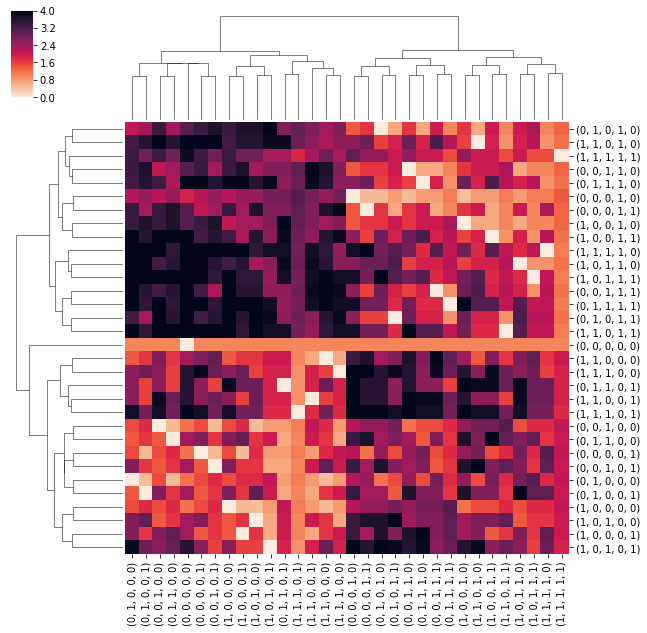

In [134]:

g = sns.clustermap(distance_matrix, vmax=4, cmap=sns.cm.rocket_r)#, z_score=0)
# print(points)
#print(g.dendrogram_row.reordered_ind)
#g.data2d

In [135]:
distance_matrix.stack().sort_values().head(256)

(0, 0, 0, 0, 0)  (0, 0, 0, 0, 0)    0.0
(0, 0, 0, 1, 1)  (0, 0, 0, 1, 1)    0.0
(0, 0, 1, 0, 0)  (0, 0, 1, 0, 0)    0.0
(0, 0, 1, 0, 1)  (0, 0, 1, 0, 1)    0.0
(0, 0, 1, 1, 0)  (0, 0, 1, 1, 0)    0.0
(0, 0, 1, 1, 1)  (0, 0, 1, 1, 1)    0.0
(0, 1, 0, 0, 0)  (0, 1, 0, 0, 0)    0.0
(0, 1, 0, 0, 1)  (0, 1, 0, 0, 1)    0.0
(0, 1, 0, 1, 0)  (0, 1, 0, 1, 0)    0.0
(0, 1, 0, 1, 1)  (0, 1, 0, 1, 1)    0.0
(0, 1, 1, 0, 0)  (0, 1, 1, 0, 0)    0.0
(0, 1, 1, 0, 1)  (0, 1, 1, 0, 1)    0.0
(0, 1, 1, 1, 0)  (0, 1, 1, 1, 0)    0.0
(0, 1, 1, 1, 1)  (0, 1, 1, 1, 1)    0.0
(0, 0, 0, 1, 0)  (0, 0, 0, 1, 0)    0.0
(1, 0, 0, 0, 0)  (1, 0, 0, 0, 0)    0.0
(1, 0, 0, 1, 0)  (1, 0, 0, 1, 0)    0.0
(1, 0, 0, 1, 1)  (1, 0, 0, 1, 1)    0.0
(1, 0, 1, 0, 0)  (1, 0, 1, 0, 0)    0.0
(1, 0, 1, 0, 1)  (1, 0, 1, 0, 1)    0.0
(1, 0, 1, 1, 0)  (1, 0, 1, 1, 0)    0.0
(1, 0, 1, 1, 1)  (1, 0, 1, 1, 1)    0.0
(1, 1, 0, 0, 0)  (1, 1, 0, 0, 0)    0.0
(1, 1, 0, 0, 1)  (1, 1, 0, 0, 1)    0.0
(1, 1, 0, 1, 0)  (1, 1, 0, 1, 0)    0.0


each key sequence is a directed graph. key1 can connect to key2 directly or through zeros only.

In [136]:
empty = (0, 0, 0, 0, 0)
possible_two_hands = []
for pos in possible_keys:
    possible_two_hands.append([pos, empty])
    possible_two_hands.append([empty, pos])

print(len(possible_keys))
print(len(possible_two_hands))

32
64


In [137]:
def difficulty_twohands(pos1, pos2):
    total_difficulty = 0
    
    pos1_left, pos1_right = [np.array(hand) for hand in pos1]
    pos2_left, pos2_right = [np.array(hand) for hand in pos2]
    
    if np.allclose(pos1_left, pos2_left) and np.allclose(pos1_right, pos2_right):
        return 0
    
    total_difficulty += difficulty_onehand(pos1_left, pos2_left)
    total_difficulty += difficulty_onehand(pos1_right, pos2_right)
    
    return total_difficulty

In [138]:
# flatten so we can use as index

two_hands_flat = []
for two_hands in possible_two_hands:
    left, right = list(two_hands[0]), list(two_hands[1])
    left.extend(right)
    two_hands_flat.append(left)

two_hands_flat = [tuple(x) for x in two_hands_flat]

In [139]:
distance_matrix = np.empty((len(two_hands_flat), len(two_hands_flat)))
distance_matrix = pd.DataFrame(distance_matrix, 
                               columns=two_hands_flat,
                               index=two_hands_flat)
for i, val1 in enumerate(possible_two_hands):
    for j, val2 in enumerate(possible_two_hands):
        distance = difficulty_twohands(val1, val2)
        #print(distance)
        distance_matrix.iloc[j, i] = distance

In [140]:
distance_matrix

,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)","(0, 0, 0, 0, 1, 0, 0, 0, 0, 0)","(0, 0, 0, 0, 0, 0, 0, 0, 0, 1)","(0, 0, 0, 1, 0, 0, 0, 0, 0, 0)","(0, 0, 0, 0, 0, 0, 0, 0, 1, 0)","(0, 0, 0, 1, 1, 0, 0, 0, 0, 0)","(0, 0, 0, 0, 0, 0, 0, 0, 1, 1)","(0, 0, 1, 0, 0, 0, 0, 0, 0, 0)","(0, 0, 0, 0, 0, 0, 0, 1, 0, 0)",...,"(1, 1, 0, 1, 1, 0, 0, 0, 0, 0)","(0, 0, 0, 0, 0, 1, 1, 0, 1, 1)","(1, 1, 1, 0, 0, 0, 0, 0, 0, 0)","(0, 0, 0, 0, 0, 1, 1, 1, 0, 0)","(1, 1, 1, 0, 1, 0, 0, 0, 0, 0)","(0, 0, 0, 0, 0, 1, 1, 1, 0, 1)","(1, 1, 1, 1, 0, 0, 0, 0, 0, 0)","(0, 0, 0, 0, 0, 1, 1, 1, 1, 0)","(1, 1, 1, 1, 1, 0, 0, 0, 0, 0)","(0, 0, 0, 0, 0, 1, 1, 1, 1, 1)"
"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)",0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)",0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
"(0, 0, 0, 0, 1, 0, 0, 0, 0, 0)",1.20,1.20,0.00,2.20,2.20,2.20,1.20,2.20,1.50,2.20,...,1.80,2.20,2.10,2.20,1.10,2.20,3.10,2.20,2.10,2.20
"(0, 0, 0, 0, 0, 0, 0, 0, 0, 1)",1.20,1.20,2.20,0.00,2.20,2.20,2.20,1.20,2.20,1.50,...,2.20,1.80,2.20,2.10,2.20,1.10,2.20,3.10,2.20,2.10
"(0, 0, 0, 1, 0, 0, 0, 0, 0, 0)",1.90,1.90,2.20,2.90,0.00,2.90,0.50,2.90,2.20,2.90,...,1.10,2.90,2.80,2.90,3.10,2.90,1.10,2.90,1.40,2.90
"(0, 0, 0, 0, 0, 0, 0, 0, 1, 0)",1.90,1.90,2.90,2.20,2.90,0.00,2.90,0.50,2.90,2.20,...,2.90,1.10,2.90,2.80,2.90,3.10,2.90,1.10,2.90,1.40
"(0, 0, 0, 1, 1, 0, 0, 0, 0, 0)",3.10,3.10,2.10,4.10,1.40,4.10,0.00,4.10,3.40,4.10,...,1.00,4.10,4.00,4.10,3.00,4.10,2.30,4.10,1.30,4.10
"(0, 0, 0, 0, 0, 0, 0, 0, 1, 1)",3.10,3.10,4.10,2.10,4.10,1.40,4.10,0.00,4.10,3.40,...,4.10,1.00,4.10,4.00,4.10,3.00,4.10,2.30,4.10,1.30
"(0, 0, 1, 0, 0, 0, 0, 0, 0, 0)",1.20,1.20,1.50,2.20,2.20,2.20,2.50,2.20,0.00,2.20,...,3.10,2.20,0.80,2.20,1.10,2.20,1.80,2.20,2.10,2.20
"(0, 0, 0, 0, 0, 0, 0, 1, 0, 0)",1.20,1.20,2.20,1.50,2.20,2.20,2.20,2.50,2.20,0.00,...,2.20,3.10,2.20,0.80,2.20,1.10,2.20,1.80,2.20,2.10


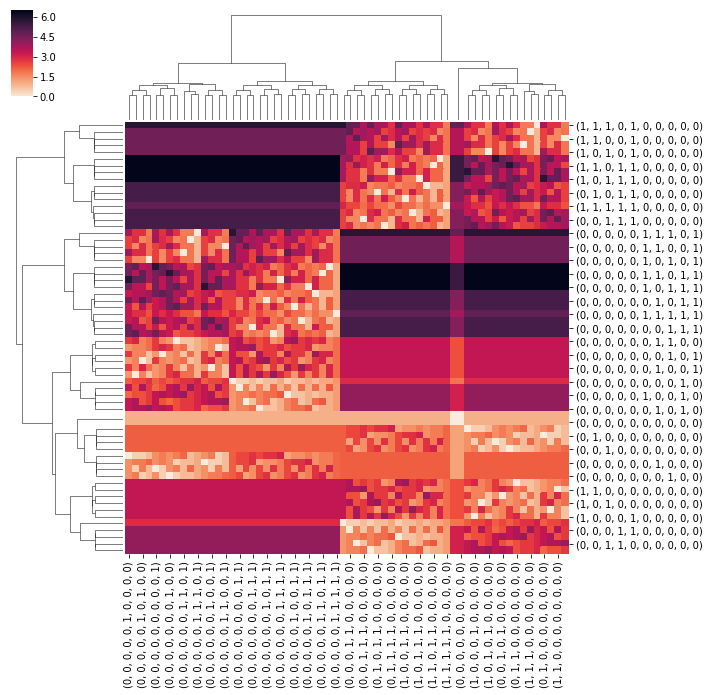

In [141]:
g = sns.clustermap(distance_matrix, cmap=sns.cm.rocket_r)#, z_score=0)
# print(points)
#print(g.dendrogram_row.reordered_ind)
#g.data2d

In [142]:
distance_matrix.stack()[lambda val: val >0.01].sort_values().head(256)

(0, 0, 0, 0, 0, 0, 0, 0, 1, 0)  (0, 0, 0, 0, 0, 1, 0, 0, 1, 0)    0.5
(0, 1, 0, 0, 0, 0, 0, 0, 0, 0)  (0, 1, 0, 0, 1, 0, 0, 0, 0, 0)    0.5
                                (0, 1, 1, 0, 0, 0, 0, 0, 0, 0)    0.5
                                (1, 1, 0, 0, 0, 0, 0, 0, 0, 0)    0.5
(0, 0, 0, 1, 0, 0, 0, 0, 0, 0)  (0, 0, 1, 1, 0, 0, 0, 0, 0, 0)    0.5
                                (0, 0, 0, 1, 1, 0, 0, 0, 0, 0)    0.5
(0, 0, 0, 0, 0, 0, 1, 0, 0, 0)  (0, 0, 0, 0, 0, 0, 1, 0, 0, 1)    0.5
                                (0, 0, 0, 0, 0, 0, 1, 1, 0, 0)    0.5
                                (0, 0, 0, 0, 0, 1, 1, 0, 0, 0)    0.5
(0, 0, 0, 0, 0, 0, 0, 0, 0, 1)  (0, 0, 0, 0, 0, 1, 0, 0, 0, 1)    0.5
                                (0, 0, 0, 0, 0, 0, 1, 0, 0, 1)    0.5
(1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  (1, 0, 0, 0, 1, 0, 0, 0, 0, 0)    0.5
                                (1, 0, 1, 0, 0, 0, 0, 0, 0, 0)    0.5
                                (1, 1, 0, 0, 0, 0, 0, 0, 0, 0)    0.5
(0, 0, 0, 0, 0, 0, 0

# two hands, with modifiers

hand1 + mod --> other
and
mod + hand2 --> other

are the same state transition

In [143]:
empty = (0, 0, 0, 0, 0)
modifiers = [empty]
for i in range(5):
    modifier = list(empty).copy()
    modifier[i] = 1
    modifiers.append(tuple(modifier))

possible_two_hands_modded = []
for pos in possible_keys:
    for modifier in modifiers:
        possible_two_hands_modded.append((pos, modifier))
        # this is symmetrical
        #possible_two_hands_modded.append((empty, modifier))
        
possible_two_hands_modded = list(set(possible_two_hands_modded))

print(len(possible_two_hands_modded))

192


In [144]:
two_hands_flat = []
for two_hands in possible_two_hands_modded:
    left, right = list(two_hands[0]), list(two_hands[1])
    left.extend(right)
    two_hands_flat.append(left)

possible_two_hands_modded_flat = [tuple(x) for x in two_hands_flat]

In [145]:
distance_matrix = np.empty((len(possible_two_hands_modded_flat), len(possible_two_hands_modded_flat)))
distance_matrix = pd.DataFrame(distance_matrix, 
                               columns=possible_two_hands_modded_flat,
                               index=possible_two_hands_modded_flat)
for i, val1 in enumerate(possible_two_hands_modded):
    for j, val2 in enumerate(possible_two_hands_modded):
        distance = difficulty_twohands(val1, val2)
        #print(distance)
        distance_matrix.iloc[j, i] = distance

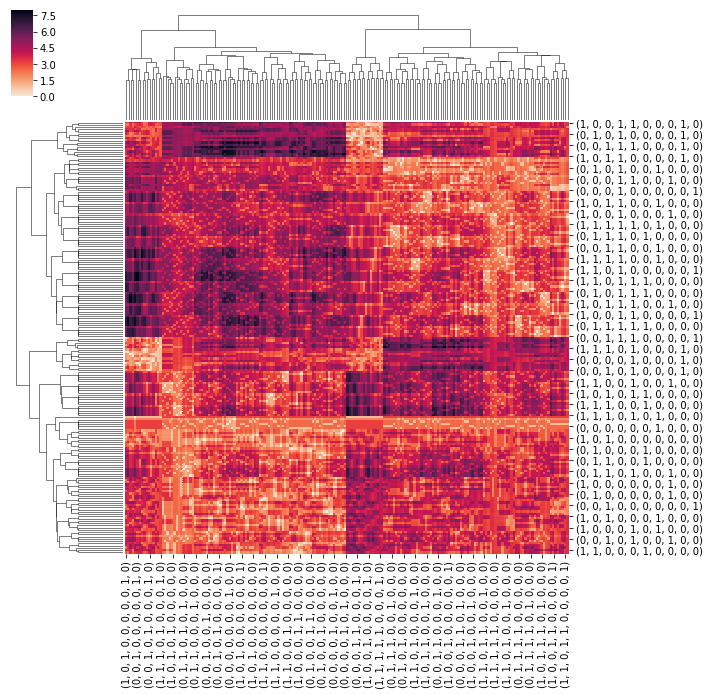

In [146]:
g = sns.clustermap(distance_matrix, cmap=sns.cm.rocket_r)#, z_score=0)
# print(points)
#print(g.dendrogram_row.reordered_ind)
#g.data2d

In [147]:
distance_matrix.stack()[lambda val: val >0.01].sort_values().head(256)

(0, 0, 1, 0, 0, 0, 0, 0, 0, 1)  (0, 1, 1, 0, 0, 0, 0, 0, 0, 1)    0.5
(0, 0, 0, 1, 0, 1, 0, 0, 0, 0)  (0, 1, 0, 1, 0, 1, 0, 0, 0, 0)    0.5
(0, 0, 1, 0, 0, 1, 0, 0, 0, 0)  (0, 1, 1, 0, 0, 1, 0, 0, 0, 0)    0.5
(0, 0, 1, 0, 0, 0, 0, 0, 0, 0)  (0, 0, 1, 0, 1, 0, 0, 0, 0, 0)    0.5
                                (1, 0, 1, 0, 0, 0, 0, 0, 0, 0)    0.5
(0, 0, 1, 0, 0, 1, 0, 0, 0, 0)  (1, 0, 1, 0, 0, 1, 0, 0, 0, 0)    0.5
(0, 0, 1, 0, 0, 0, 0, 0, 0, 0)  (0, 1, 1, 0, 0, 0, 0, 0, 0, 0)    0.5
(0, 0, 1, 0, 0, 1, 0, 0, 0, 0)  (0, 0, 1, 0, 1, 1, 0, 0, 0, 0)    0.5
(0, 0, 0, 0, 1, 1, 0, 0, 0, 0)  (1, 0, 0, 0, 1, 1, 0, 0, 0, 0)    0.5
(0, 1, 0, 0, 0, 0, 0, 0, 0, 1)  (0, 1, 1, 0, 0, 0, 0, 0, 0, 1)    0.5
                                (1, 1, 0, 0, 0, 0, 0, 0, 0, 1)    0.5
                                (0, 1, 0, 0, 1, 0, 0, 0, 0, 1)    0.5
(0, 0, 0, 0, 1, 0, 0, 0, 1, 0)  (0, 0, 1, 0, 1, 0, 0, 0, 1, 0)    0.5
                                (0, 1, 0, 0, 1, 0, 0, 0, 1, 0)    0.5
(0, 0, 0, 0, 1, 1, 0

In [148]:
difficulty_twohands([[1, 0, 1, 0, 1], [0, 0, 1, 0, 0]], [(1, 0, 1, 0, 1), (1, 0, 0, 0, 0)])

1.5

In [149]:
difficulty_onehand([0, 0, 1, 0, 0], (1, 0, 0, 0, 0))

1.5

In [150]:
difficulty_onehand([1, 0, 1, 0, 1], (1, 0, 1, 0, 1))

0

In [151]:
#(0, 0, 0, 1, 0, 0, 0, 0, 0, 0)  (0, 0, 0, 1, 1, 0, 0, 0, 0, 0)
difficulty_onehand([0, 0, 0, 1, 0], [0, 0, 0, 1, 1])

1.4

In [152]:
difficulty_twohands(((0, 0, 0, 1, 0), (0, 0, 0, 0, 0)),  ((0, 0, 0, 1, 1), (0, 0, 0, 0, 0)))

1.4